### Poisson Distribution
- Model is founded on the number of goals scored/conceded by each team

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import os
from scipy.stats import poisson,skellam

In [3]:
epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv") # All match results from 
# the 2016/17 Premier League Season
epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG']] # Only need team names and Full Time Home Goals and Full Time Away goals for this
epl_1617 = epl_1617.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'}) # Rename some labels to be clearer
epl_1617.head()


,HomeTeam,AwayTeam,HomeGoals,AwayGoals
0,Burnley,Swansea,0,1
1,Crystal Palace,West Brom,0,1
2,Everton,Tottenham,1,1
3,Hull,Leicester,2,1
4,Man City,Sunderland,2,1


In [4]:
# Task is to model the final round of fixtures in the season so must remove the last 10 rows
epl_1617 = epl_1617[:-10]
epl_1617.mean()

HomeGoals    1.591892
AwayGoals    1.183784
dtype: float64

- On average home team scores more goals than the away team
- Home field advantage
### Poisson distribution
- Discrete probability distribution that describes the probability of events within a specific time period (e.g. 90 minutes) with a known rate of occurence
- Key assumption is that the number of events is independent of time
- Means that goals don't become more/less likely by the number of goals already scored in the match
- Instead number of goals is expressed purely purely as a function of the average rate of gates
- P(x)=(e^−λ*λ^x)/x!,λ>0
- λ is the average rate (e.g. average number of goals, letters you receive etc)
- Can use this statistical model to estimate the probability of specific events
- P(>=2|Home) = P(2|Home) + P(3|Home)+...
- Probablity of draw P(Draw) = sum of events where the two teams score the same amount of goals
- Difference of two Poisson distributions is called a _Skellam distribution_

In [5]:
# Probability of a draw between home and away team
skellam.pmf(0.0, epl_1617.mean()[0], epl_1617.mean()[1])

0.24809376810717076

In [6]:
# Probablity of home team winning by one goal
skellam.pmf(1, epl_1617.mean()[0], epl_1617.mean()[1])

0.22706765807563964

In [14]:
np.shape(epl_1617)

(370, 4)

- Can adapt this approach to model specific matches
- Need to know the average number of goals scored by each team and feed this data into a Poisson model

## Building a model
- Number of goals scored by each team can be approximated by a Poisson distribution
- Due to a small sample size the accuracy of this approximation can vary significantly
- Won't treat each match separately - build a more general Poisson regression model

In [13]:
# importing tools required for the Poisson regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Below if home team then make HomeTeam team and AwayTeam opponennt and vice versa
goal_model_data = pd.concat([epl_1617[['HomeTeam','AwayTeam','HomeGoals']].assign(home=1).rename(
            columns={'HomeTeam':'team', 'AwayTeam':'opponent','HomeGoals':'goals'}),
           epl_1617[['AwayTeam','HomeTeam','AwayGoals']].assign(home=0).rename(
            columns={'AwayTeam':'team', 'HomeTeam':'opponent','AwayGoals':'goals'})])
np.shape(goal_model_data)

(740, 4)

In [15]:
goal_model_data.applymap(np.isreal)

,team,opponent,goals,home
0,False,False,True,True
1,False,False,True,True
2,False,False,True,True
3,False,False,True,True
4,False,False,True,True
5,False,False,True,True
6,False,False,True,True
7,False,False,True,True
8,False,False,True,True
9,False,False,True,True


In [12]:
# Creates a poisson model using the statsmodels generalised linear model (glm) with goals as the dependent variable and
# home (i.e. if home team or not), team and opponent as input variables (R-style syntax), data is above 
# and family specifies as Poisson
# .fit() fits a generalised linear model for a given family
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data,
                       family=sm.families.Poisson()).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  740
Model:                            GLM   Df Residuals:                      700
Model Family:                 Poisson   Df Model:                           39
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1042.4
Date:                Wed, 11 Mar 2020   Deviance:                       776.11
Time:                        13:20:40   Pearson chi2:                     659.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3725      0.198      1.880      0.060      -0.016       0.761
team[T.Bournemouth]           -0.2891      0.179     -1.612      0.107      -0.641       0.062
team[T.Burnley]               -0.6458      0.200     -3.230      0.001      -1.038      -0.254
team[T.Chelsea]                0.0789      0.162      0.488      0.626      -0.238       0.396
team[T.Crystal Palace]        -0.3865      0.183     -2.107      0.035      -0.746      -0.027
team[T.Everton]               -0.2008      0.173     -1.161      0.246      -0.540       0.138
team[T.Hull]                  -0.7006      0.204     -3.441      0.001      -1.100      -0.302
team[T.Leicester]             -0.4204      0.187     -2.249      0.025      -0.787      -0.054
team[T.Liverpool]              0.0162      0.164      0.099      0.921      -0.306       0.338
team[T.Man City]               0.0117      0.164      0.072      0.943      -0.310       0.334
team[T.Man United]            -0.3572      0.181     -1.971      0.049      -0.713      -0.002
team[T.Middlesbrough]         -1.0087      0.225     -4.481      0.000      -1.450      -0.568
team[T.Southampton]           -0.5804      0.195     -2.976      0.003      -0.963      -0.198
team[T.Stoke]                 -0.6082      0.197     -3.094      0.002      -0.994      -0.223
team[T.Sunderland]            -0.9619      0.222     -4.329      0.000      -1.397      -0.526
team[T.Swansea]               -0.5136      0.192     -2.673      0.008      -0.890      -0.137
team[T.Tottenham]              0.0532      0.162      0.328      0.743      -0.265       0.371
team[T.Watford]               -0.5969      0.197     -3.035      0.002      -0.982      -0.211
team[T.West Brom]             -0.5567      0.194     -2.876      0.004      -0.936      -0.177
team[T.West Ham]              -0.4802      0.189     -2.535      0.011      -0.851      -0.109
opponent[T.Bournemouth]        0.4109      0.196      2.092      0.036       0.026       0.796
opponent[T.Burnley]            0.1657      0.206      0.806      0.420      -0.237       0.569
opponent[T.Chelsea]           -0.3036      0.234     -1.298      0.194      -0.762       0.155
opponent[T.Crystal Palace]     0.3287      0.200      1.647      0.100      -0.062       0.720
opponent[T.Everton]           -0.0442      0.218     -0.202      0.840      -0.472       0.384
opponent[T.Hull]               0.4979      0.193      2.585      0.010       0.120       0.875
opponent[T.Leicester]          0.3369      0.199      1.694      0.090      -0.053       0.727
opponent[T.Liverpool]         -0.0374      0.217     -0.172      0.863      -0.463       0.389
opponent[T.Man City]          -0.0993      0.222     -0.448      0.654      -0.534       0.335
opponent[T.Man United]        -0.4220      0.241     -1.754      0.079      -0.894       0.050
opponent[T.Middlesbrough]  

In [ ]:
# Gives an glm regression result summary
poisson_model.summary()

- Values in the _coef_ column above - analogous to the slopes in linear regression
- Take exponent of parameter values P(x) = e^coeff
- Positive value implies more goals while values closer to zero represent more neutral effects
- Home has a coef of 0.2969 - captures the fact that home teams generally score more goals than the away team - e.g. e^0.2969 = 1.35 times more likely
- Chelsea has coef of 0.0789 and Sunderland has -0.9619 which means Chelsea are better and Sunderland are much worse scorers
- Opponent coef values (e.g. opponent[T.Chelsea]) penalise/reward teams based on the quality of the opposition
- Reflects defensive strength of each team
- In other words you're less likely to score against Chelsea (with a negative value of -0.3036)
- Against Sutherland the value is 0.3707 - more likely to score

In [9]:
# Make some predictions for upcoming matches
# Pass teams into poisson_model and it'll return the average number of goals for that team
# Need to run it twice - calculate the expected average number of goals for each team separately
# Predict average number of goals for Chelsea vs Sunderland with Chelsea as the home team
poisson_model.predict(pd.DataFrame(data={'team': 'Chelsea', 'opponent': 'Sunderland',
                                       'home':1},index=[1]))

1    3.061662
dtype: float64

In [19]:
# Predict average number of goals for Sunderland vs Chelsea with Sunderland as the away team
poisson_model.predict(pd.DataFrame(data={'team': 'Sunderland', 'opponent': 'Chelsea',
                                       'home':0},index=[1]))

1    0.409373
dtype: float64

In [21]:
# Wrap up above in a simulate match function for re-usability
def simulate_match(foot_model, homeTeam, awayTeam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team': homeTeam,
                                                          'opponent': awayTeam,'home':1},
                                                    index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team': awayTeam,
                                                          'opponent': homeTeam,
                                                          'home':0},
                                                    index=[1])).values[0]
    # List comprehension to calculate the team predicted
    team_pred = [[poisson.pmf(i, team_avg) for i in range (0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

simulate_match(poisson_model, 'Chelsea', 'Sunderland', max_goals=3)

array([[0.03108485, 0.01272529, 0.00260469, 0.00035543],
       [0.0951713 , 0.03896054, 0.00797469, 0.00108821],
       [0.14569118, 0.059642  , 0.01220791, 0.00166586],
       [0.14868571, 0.06086788, 0.01245883, 0.0017001 ]])

- Matrix above shows the probability of Chelsea (rows of the matrix) and Sunderland (matrix columns) scoring a specific number of goals
- e.g. on the diagonal both teams score the same number of goals (e.g. P(0-0)=0.031 --> calculate the odds of a draw by summing all the diagonal entries
- Everything below the diagonal represents a Chelsea victory (e.g. P(3-0)=0.149
- e.g. P(1(Chelsea)0(Sunderland))=0.09
- For Over/Under markets - can estimate P(Under 2.5 goals) by summing the entries where the sum of the column number and row number (both 0 indexed) is less than 3

In [22]:
chel_sun = simulate_match(poisson_model, "Chelsea", "Sunderland", max_goals=10)
# Chelsea win
np.sum(np.tril(chel_sun, -1))
# np.tril returns the lower triangle of an array (chel_sun) and index = -1 refers to the diagonal for the triangle
# -1 means 1 below the main diagonal
# np.sum adds up the returned triangle

0.8885986612364141

In [23]:
# Draw
np.sum(np.diag(chel_sun))
# Sums up the diagonal as this is 0-0, 1-1, 2-2 etc

0.08409349268649546

In [24]:
# Sunderland win
np.sum(np.triu(chel_sun, 1))
# np.triu returns the upper triangle of an array (chel_sun)
# 1 means 1 above the main diagonal
# np.sum adds up the returned triangle

0.02696181994285289

## Sports Betting/Trading
- On betting exchanges you bet against other people
- Acts as a sort of stock market for sporting events
- Assuming _efficient market hypothesis_ prices available at Betfair reflect the true price/odds of these events happening (in theory)
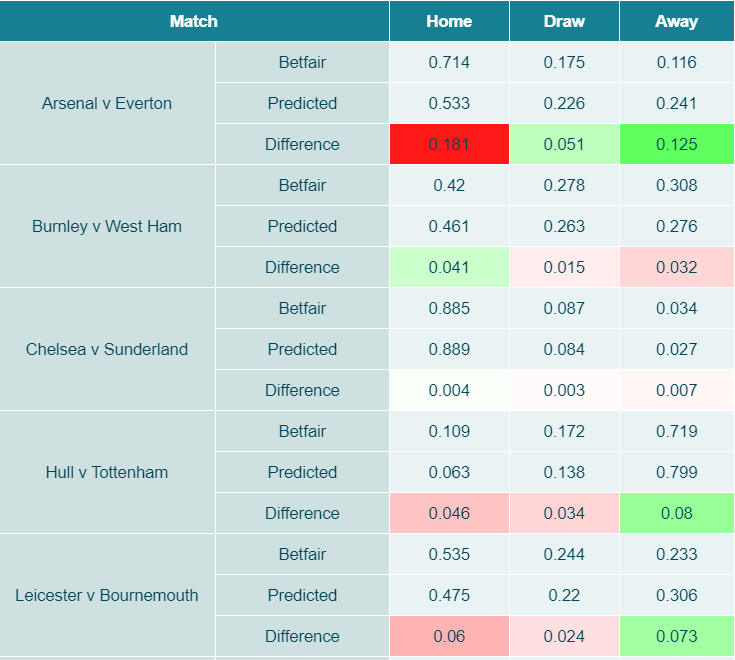
- Numbers inside boxes represent the best available prices and amount available at those prices
- Blue boxes signify back bets (i.e. betting that the event will happen - going long)
- Pink boxes represent lay bets (i.e. betting that something won't happen - shorting)
- e.g. if you were to bet $ 100 Chelsea to win - would receive original amount plus 100*1.13 should they win
- If lost, then lose everything
- Converting this to decimal odds is 1/1.13 = 0.889
- 1 is home team winning, X is draw and 2 is the away team winning
- 1 / 11.5 = 0.087 chance for draw, 1 / 29 = 0.0344 chance for Chelsea losing
- Have model probabilities and assuming the exchange is right we know the true probabilities of each event happening
- Ideally model should identify situations the market has underestimated the chances of an event occuring (or not occuring in the case of lay bets)
- Can compare the odds returned by our model and the Betfair exchange
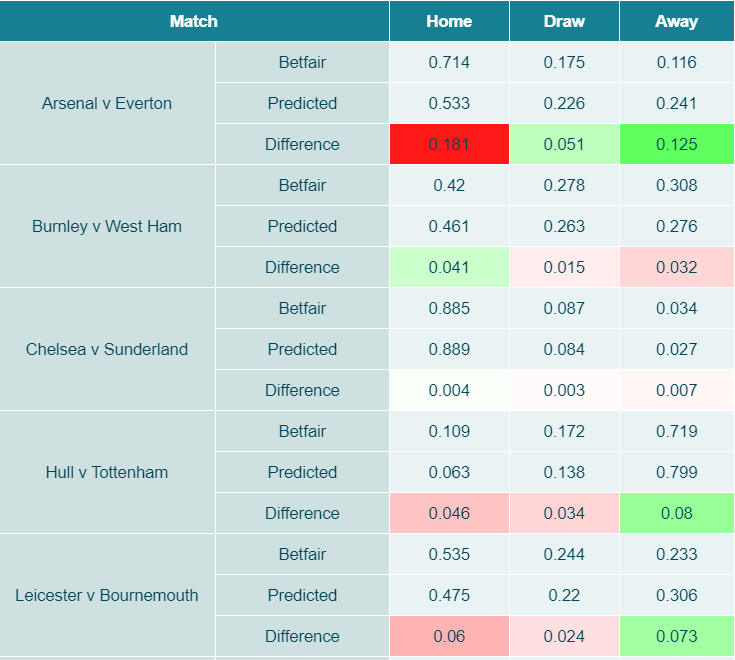

- Green cells above illustrate opportunities to make profitable bets according to our model
- Strong colours imply either our model is wrong or the exchange is wrong - likely our model

- Is a Poisson distribution even appropriate?
- Model was founded on the belief that the number of goals can be accurately expressed as a Poisson distribution
- If assumption misguided, then model outputs will be unreliable
- Given Possion distribution with mean λ then the number of events in half that time period follows a Poisson distribution with mean λ/2
- Means that there should be an equal number of goals in first and second halves
- Doesn't seem to hold true
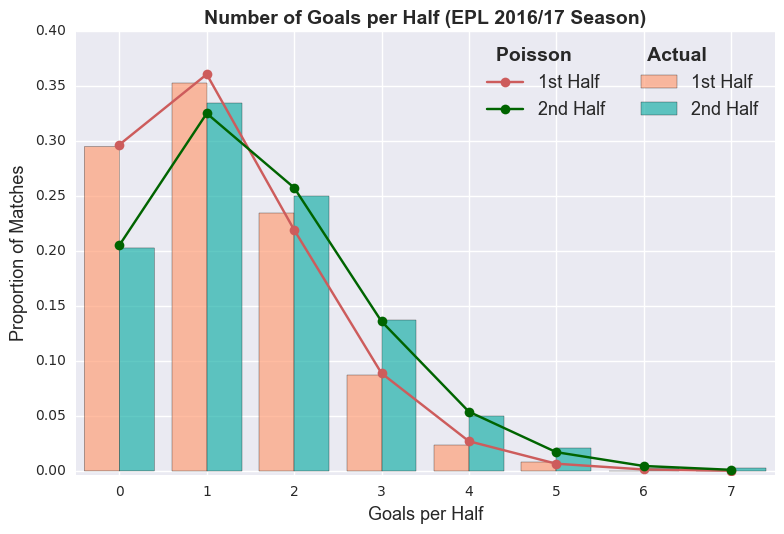

In [27]:
epl_1617_halves = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
epl_1617_halves = epl_1617_halves[['FTHG', 'FTAG', 'HTHG', 'HTAG']]
epl_1617_halves['FHgoals'] = epl_1617_halves['HTHG'] + epl_1617_halves['HTAG']
epl_1617_halves['SHgoals'] = epl_1617_halves['FTHG'] + epl_1617_halves['FTAG'] - epl_1617_halves['FHgoals']
epl_1617_halves = epl_1617_halves[['FHgoals', 'SHgoals']]

- Have evidence that violates the fundamental assumption of the model - rendering it pointless
- Rather than simple univariate Poisson model
- Might have more success with a bivariate Poisson distribuiton
- Or Weibull distribution